In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Dropout, Flatten
from keras.utils import to_categorical
from keras.datasets import cifar10
import keras

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)

In [4]:
x_train = (x_train)/255
x_test = (x_test)/255

In [5]:
y_test[0].shape

(10,)

In [6]:
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=3,padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=64, kernel_size=3,padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=3,activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [7]:
res = model.fit(x_train,
          y_train,
          batch_size=12,
          epochs = 50,
          validation_data = (x_test,y_test))

Epoch 1/50
4167/4167 [==============================] - 37s 7ms/step - loss: 1.5897 - accuracy: 0.4162 - val_loss: 1.2683 - val_accuracy: 0.5462
Epoch 2/50
4167/4167 [==============================] - 26s 6ms/step - loss: 1.2166 - accuracy: 0.5699 - val_loss: 1.0356 - val_accuracy: 0.6418
Epoch 3/50
4167/4167 [==============================] - 28s 7ms/step - loss: 1.0683 - accuracy: 0.6283 - val_loss: 0.9187 - val_accuracy: 0.6829
Epoch 4/50
4167/4167 [==============================] - 27s 6ms/step - loss: 0.9831 - accuracy: 0.6601 - val_loss: 0.8856 - val_accuracy: 0.6944
Epoch 5/50
4167/4167 [==============================] - 27s 6ms/step - loss: 0.9196 - accuracy: 0.6821 - val_loss: 0.8930 - val_accuracy: 0.6960
Epoch 6/50
4167/4167 [==============================] - 27s 7ms/step - loss: 0.8750 - accuracy: 0.6986 - val_loss: 0.8536 - val_accuracy: 0.7052
Epoch 7/50
4167/4167 [==============================] - 27s 6ms/step - loss: 0.8350 - accuracy: 0.7127 - val_loss: 0.8700 - val_ac

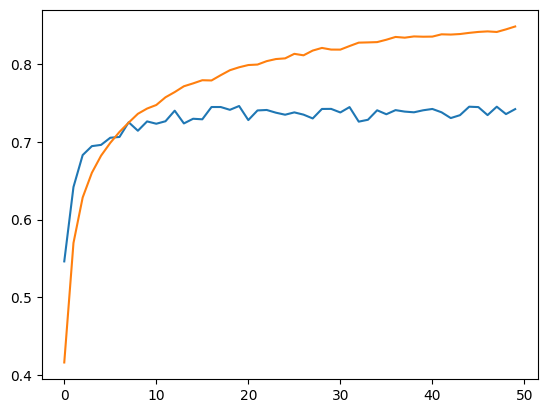

In [8]:
plt.plot(res.history['val_accuracy'])
plt.plot(res.history['accuracy'])